<a href="https://colab.research.google.com/github/Tamripo/Proyecto-Final/blob/main/Proyecto_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1. Objetivo

Predecir si un colaborador cumple o no un KPI mayor al 80%, en base al conjunto de datos proporcionados.

#2. Importación de datos y librerías


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_selector
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [ ]:
df= pd.read_csv('/content/Uncleaned_employees_final_dataset (1) (1).csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17417 entries, 0 to 17416
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   employee_id            17417 non-null  int64  
 1   department             17417 non-null  object 
 2   region                 17417 non-null  object 
 3   education              16646 non-null  object 
 4   gender                 17417 non-null  object 
 5   recruitment_channel    17417 non-null  object 
 6   no_of_trainings        17417 non-null  int64  
 7   age                    17417 non-null  int64  
 8   previous_year_rating   16054 non-null  float64
 9   length_of_service      17417 non-null  int64  
 10  KPIs_met_more_than_80  17417 non-null  int64  
 11  awards_won             17417 non-null  int64  
 12  avg_training_score     17417 non-null  int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 1.7+ MB


In [ ]:
df[df.duplicated()]

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met_more_than_80,awards_won,avg_training_score
17414,49584,HR,region_7,Bachelors,m,other,1,33,1.0,9,0,0,51
17415,49584,HR,region_7,Bachelors,m,other,1,33,1.0,9,0,0,51


In [ ]:
df.drop_duplicates(inplace=True)

* Exiten valores duplicados que ya fueron eliminados y hay valores nulos en las columnas 'education' y 'previous_year_rating'.

In [ ]:
df['education'].value_counts()

education
Bachelors          11517
Masters & above     4841
Below Secondary      286
Name: count, dtype: int64

* 17412-16646 = 769 valores que representan el 4.4% del total de los datos, al no ser representativo se procederá a eliminar los nulos.

In [ ]:
f1 = df['education'].isna()

In [ ]:
df = df[~f1]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16644 entries, 0 to 17416
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   employee_id            16644 non-null  int64  
 1   department             16644 non-null  object 
 2   region                 16644 non-null  object 
 3   education              16644 non-null  object 
 4   gender                 16644 non-null  object 
 5   recruitment_channel    16644 non-null  object 
 6   no_of_trainings        16644 non-null  int64  
 7   age                    16644 non-null  int64  
 8   previous_year_rating   15422 non-null  float64
 9   length_of_service      16644 non-null  int64  
 10  KPIs_met_more_than_80  16644 non-null  int64  
 11  awards_won             16644 non-null  int64  
 12  avg_training_score     16644 non-null  int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 1.8+ MB


* 16644-15422 = 1222 valores que representan el 7.3% del total de los datos, al no ser representativo se procederá a eliminar los nulos.

In [ ]:
df['previous_year_rating'].value_counts()

previous_year_rating
3.0    5559
5.0    3700
4.0    3057
1.0    1871
2.0    1235
Name: count, dtype: int64

In [ ]:
f2 = df['previous_year_rating'].isna()

In [ ]:
df = df[~f2]

In [ ]:
df.describe()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met_more_than_80,awards_won,avg_training_score
count,15422.000000,15422.000000,15422.000000,15422.000000,15422.000000,15422.000000,15422.000000,15422.000000
mean,39084.521139,1.247504,35.632084,3.355337,6.258138,0.361561,0.023927,63.366295
std,22714.843507,0.588582,7.577190,1.263761,4.115930,0.480468,0.152826,13.300812
min,3.000000,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000
25%,19321.250000,1.000000,30.000000,3.000000,3.000000,0.000000,0.000000,51.000000
50%,39049.500000,1.000000,34.000000,3.000000,5.000000,0.000000,0.000000,60.000000
75%,58933.250000,1.000000,39.000000,4.000000,8.000000,1.000000,0.000000,75.000000
max,78295.000000,9.000000,60.000000,5.000000,34.000000,1.000000,1.000000,99.000000


Los Id de los colaboradores no serán tomados en la construcción del modelo por lo que se eliminan.

In [ ]:
df = df.drop ('employee_id', axis = 1)

In [ ]:
df = df.drop ('region', axis = 1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15422 entries, 1 to 17416
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   department             15422 non-null  object 
 1   education              15422 non-null  object 
 2   gender                 15422 non-null  object 
 3   recruitment_channel    15422 non-null  object 
 4   no_of_trainings        15422 non-null  int64  
 5   age                    15422 non-null  int64  
 6   previous_year_rating   15422 non-null  float64
 7   length_of_service      15422 non-null  int64  
 8   KPIs_met_more_than_80  15422 non-null  int64  
 9   awards_won             15422 non-null  int64  
 10  avg_training_score     15422 non-null  int64  
dtypes: float64(1), int64(6), object(4)
memory usage: 1.4+ MB


In [ ]:
df['department'].value_counts()

department
Sales & Marketing    4601
Operations           3284
Procurement          2077
Technology           1984
Analytics            1436
HR                    738
Finance               716
R&D                   299
Legal                 287
Name: count, dtype: int64

In [ ]:
df['gender'].value_counts()

gender
m    10811
f     4611
Name: count, dtype: int64

In [ ]:
df['recruitment_channel'].value_counts()

recruitment_channel
other       8659
sourcing    6476
referred     287
Name: count, dtype: int64

In [ ]:
df['no_of_trainings'].value_counts()

no_of_trainings
1    12459
2     2350
3      453
4      115
5       24
6       12
7        5
8        2
9        2
Name: count, dtype: int64

In [ ]:
df['age'].value_counts()

age
31    1050
30    1034
32    1020
33     989
34     917
29     858
35     844
36     757
28     754
37     673
27     628
38     607
39     556
40     490
26     451
41     421
42     330
43     319
44     259
25     250
45     222
46     200
47     182
49     173
48     159
50     149
52     129
51     118
53     117
24     111
54     102
55     102
56      84
58      75
60      68
57      60
59      57
23      57
22      20
20      20
21      10
Name: count, dtype: int64

In [ ]:
df['length_of_service'].value_counts()

length_of_service
3     2158
4     2081
2     1942
5     1842
7     1708
6     1441
8      910
9      774
10     683
11     265
12     233
13     203
14     183
15     171
16     167
17     144
18     128
1      120
19      94
20      40
21      23
23      20
22      17
24      14
25      13
26      10
27       9
28       9
29       9
30       5
31       3
33       1
34       1
32       1
Name: count, dtype: int64

In [ ]:
df['KPIs_met_more_than_80'].value_counts()

KPIs_met_more_than_80
0    9846
1    5576
Name: count, dtype: int64

In [ ]:
df['awards_won'].value_counts()

awards_won
0    15053
1      369
Name: count, dtype: int64

In [ ]:
df['avg_training_score'].value_counts()

avg_training_score
50    753
49    722
48    685
51    660
59    613
     ... 
98      8
42      8
41      5
40      2
39      1
Name: count, Length: 61, dtype: int64

array([[<Axes: title={'center': 'no_of_trainings'}>,
        <Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'previous_year_rating'}>],
       [<Axes: title={'center': 'length_of_service'}>,
        <Axes: title={'center': 'KPIs_met_more_than_80'}>,
        <Axes: title={'center': 'awards_won'}>],
       [<Axes: title={'center': 'avg_training_score'}>, <Axes: >,
        <Axes: >]], dtype=object)

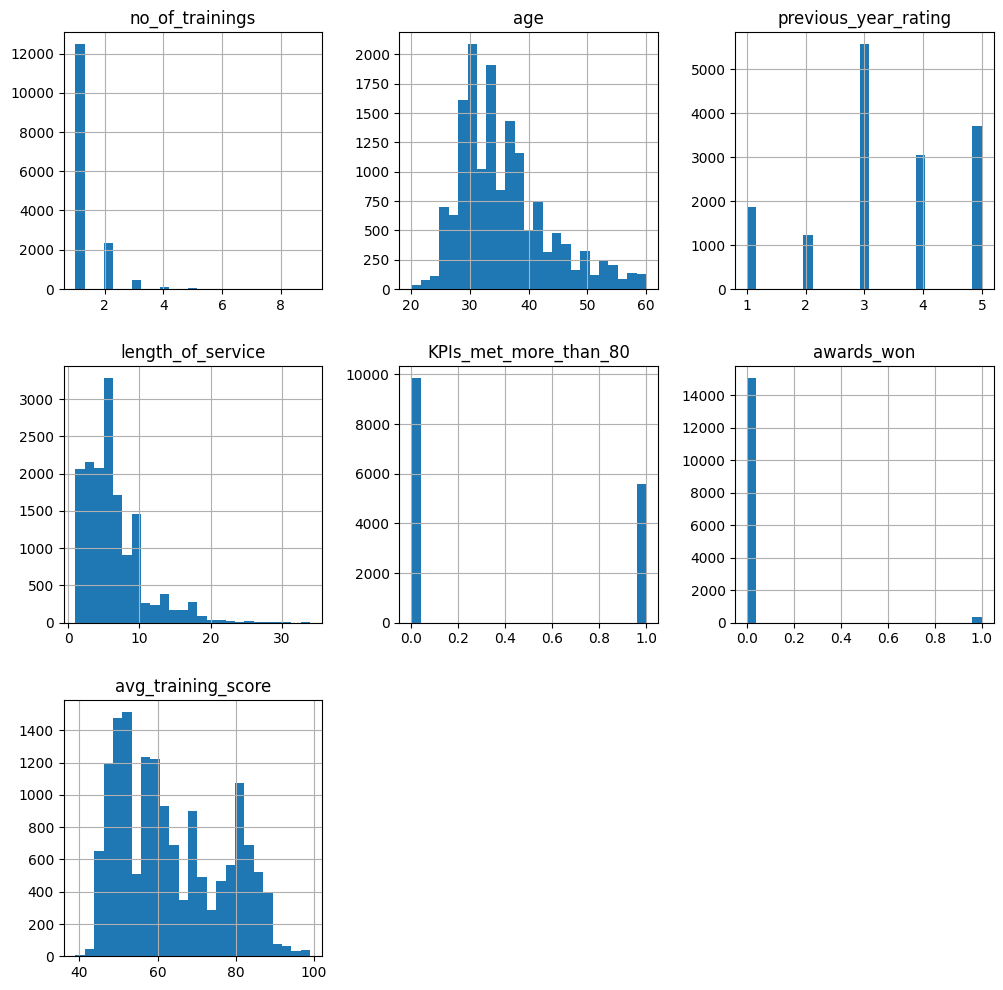

In [ ]:
df.hist(bins=25, figsize=(12, 12), xlabelsize='10', ylabelsize='10')

* El número de entrenamientos tiene valores en mayor concentración en 0. Se podría evaluar no tomar en cuenta la columna para el estudio.
* La edad tienen una distribución asimétrica positiva, tiene una población en menor cantidad en personas mayores de 40 años.
* Los años de servicio también tienen una distribución asimétrica positiva, en este caso si se puede visualiazar algunos valores outliers en después de los 20 años. Se podría evaluar no tomar en cuenta los valores mayores a 20 años.
* En el caso del promedio de nota de entrenamiento tiene 3 grupos pico, podría ser 3 modal; sin embargo uno de los picos es mayor entre 40 y 60 puntos.

In [ ]:
df.to_csv('Data_limpia.csv')

In [ ]:
corr_matrix = df.corr(numeric_only=True)
corr_matrix['KPIs_met_more_than_80'].sort_values(ascending=False)

KPIs_met_more_than_80    1.000000
previous_year_rating     0.342993
awards_won               0.108257
avg_training_score       0.059853
age                     -0.031002
no_of_trainings         -0.046338
length_of_service       -0.087499
Name: KPIs_met_more_than_80, dtype: float64

<Axes: >

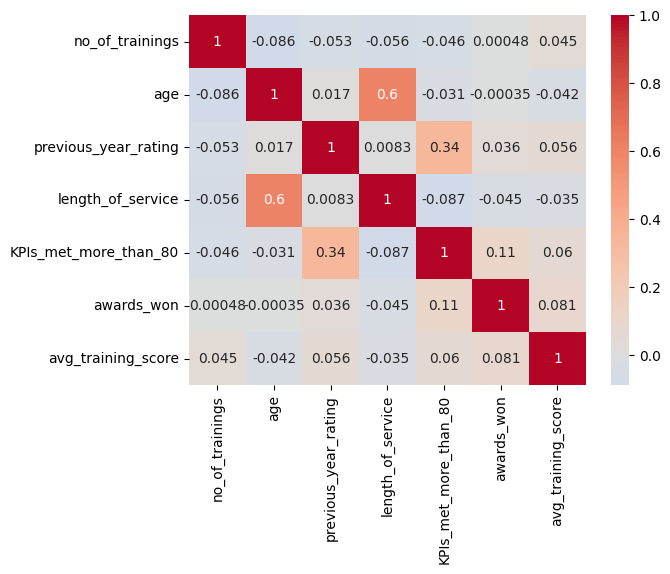

In [ ]:
import seaborn as sns
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", center=0)


* Existe correlación entre los años de servicio en la empresa y la edad de los colaboradores.
* Existe correlación entre la calificación de desempeño anterior con los KPIs.
* Existe correlación en menor medida la calificación del desempeño con la cantidad de premios obtenidos y la nota promedio de sus entrenamientos.
+ Existe correlación en menor medida respecto los KPIs con la cantidad de premios obtenidos y la nota promedio de sus entrenamientos.

#3. Preprocesamiento de data

In [ ]:
df_new = df.drop(['no_of_trainings','age','education','recruitment_channel'], axis=1)

In [ ]:
#f3 = df_new['length_of_service']>20

In [ ]:
#df_new = df_new[~f3]

In [ ]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15422 entries, 1 to 17416
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   department             15422 non-null  object 
 1   gender                 15422 non-null  object 
 2   previous_year_rating   15422 non-null  float64
 3   length_of_service      15422 non-null  int64  
 4   KPIs_met_more_than_80  15422 non-null  int64  
 5   awards_won             15422 non-null  int64  
 6   avg_training_score     15422 non-null  int64  
dtypes: float64(1), int64(4), object(2)
memory usage: 963.9+ KB


In [ ]:
y = df_new['KPIs_met_more_than_80']
X = df_new.drop('KPIs_met_more_than_80', axis=1)

In [ ]:
X.shape

(15422, 6)

In [ ]:
y.shape

(15422,)

In [ ]:
cat_selector = make_column_selector(dtype_include='object')
num_selector = make_column_selector(dtype_include='number')

one_hot_encoder = OneHotEncoder()
standard_scaler = StandardScaler()

imputer_num = SimpleImputer(strategy='mean')

In [ ]:
col_transformer = make_column_transformer((standard_scaler, num_selector),
                                          (one_hot_encoder, cat_selector),
                        remainder = 'passthrough')
col_transformer

ColumnTransformer(remainder='passthrough',
                  transformers=[('standardscaler', StandardScaler(),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7cba0a8e9930>),
                                ('onehotencoder', OneHotEncoder(),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7cba0a8e9540>)])

In [ ]:
col_transformer.fit(X)

ColumnTransformer(remainder='passthrough',
                  transformers=[('standardscaler', StandardScaler(),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7cba0a8e9930>),
                                ('onehotencoder', OneHotEncoder(),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7cba0a8e9540>)])

In [ ]:
aux=col_transformer.transform(X)
X_procesado=pd.DataFrame(aux,columns=col_transformer.get_feature_names_out())
X_procesado.info()
X_procesado

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15422 entries, 0 to 15421
Data columns (total 15 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   standardscaler__previous_year_rating         15422 non-null  float64
 1   standardscaler__length_of_service            15422 non-null  float64
 2   standardscaler__awards_won                   15422 non-null  float64
 3   standardscaler__avg_training_score           15422 non-null  float64
 4   onehotencoder__department_Analytics          15422 non-null  float64
 5   onehotencoder__department_Finance            15422 non-null  float64
 6   onehotencoder__department_HR                 15422 non-null  float64
 7   onehotencoder__department_Legal              15422 non-null  float64
 8   onehotencoder__department_Operations         15422 non-null  float64
 9   onehotencoder__department_Procurement        15422 non-null  float64
 10

,standardscaler__previous_year_rating,standardscaler__length_of_service,standardscaler__awards_won,standardscaler__avg_training_score,onehotencoder__department_Analytics,onehotencoder__department_Finance,onehotencoder__department_HR,onehotencoder__department_Legal,onehotencoder__department_Operations,onehotencoder__department_Procurement,onehotencoder__department_R&D,onehotencoder__department_Sales & Marketing,onehotencoder__department_Technology,onehotencoder__gender_f,onehotencoder__gender_m
0,-0.281183,-0.305685,-0.156568,-0.929770,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,-1.863812,-0.548651,-0.156568,-1.230513,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,-1.072497,0.666180,-0.156568,0.122831,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,0.510132,0.180248,-0.156568,-0.177912,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,-0.281183,-1.034584,-0.156568,0.348389,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15417,-0.281183,0.909146,-0.156568,-0.779398,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
15418,-1.072497,-0.305685,-0.156568,-1.380885,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
15419,1.301446,-0.062719,-0.156568,1.325805,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
15420,-1.863812,0.666180,-0.156568,-0.929770,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
X_train, X_test, y_train, y_test=train_test_split(X_procesado,y,test_size=0.3)

##3.1 Arbol de Desiciones

In [ ]:
from sklearn.tree import DecisionTreeClassifier
tree_class = DecisionTreeClassifier(max_depth=9)
tree_class

DecisionTreeClassifier(max_depth=9)

In [ ]:
tree_class.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=9)

In [ ]:
tree_class.score(X_train, y_train)

0.7404353867531265

In [ ]:
tree_class.score(X_test, y_test)

0.708018154311649

In [ ]:
y_pred=tree_class.predict(X_test)

In [ ]:
resultados=pd.DataFrame()
resultados["Y real"]=y_test
resultados["Y predicho"]=y_pred
resultados.reset_index(drop=True)

,Y real,Y predicho
0,0,0
1,0,0
2,1,0
3,0,0
4,0,0
...,...,...
4622,0,0
4623,1,1
4624,1,1
4625,1,0


In [ ]:
conf_mat = confusion_matrix(y_test, y_pred)
conf_mat

array([[2231,  699],
       [1308,  389]])

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.63      0.76      0.69      2930
           1       0.36      0.23      0.28      1697

    accuracy                           0.57      4627
   macro avg       0.49      0.50      0.48      4627
weighted avg       0.53      0.57      0.54      4627



<ipython-input-1128-04ae7d9544ed>:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['']+labels)
<ipython-input-1128-04ae7d9544ed>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['']+labels)


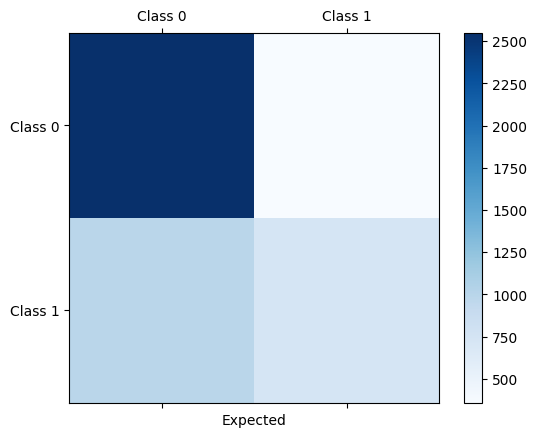

In [ ]:
labels = ['Class 0', 'Class 1']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(conf_mat,cmap=plt.cm.Blues)
fig.colorbar(cax)
ax.set_xticklabels(['']+labels)
ax.set_yticklabels(['']+labels)
plt.xlabel('Predicted')
plt.xlabel('Expected')
plt.show()

##3.2 Random Forest

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [ ]:
X_train, X_test, y_train, y_test=train_test_split(X_procesado,y,test_size=0.3)

In [ ]:
rndf_class = RandomForestClassifier(n_estimators=100, random_state=42)
rndf_class.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
rndf_class.score(X_train, y_train)

0.8479851783232978

In [ ]:
y_pred_1 = rndf_class.predict(X_test)

In [ ]:
rndf_class.score(X_test, y_test)

0.6611195158850227

In [ ]:
resultados=pd.DataFrame()
resultados["Y real_1"]=y_test
resultados["Y predicho_1"]=y_pred_1
resultados.reset_index(drop=True)

,Y real_1,Y predicho_1
0,1,0
1,0,0
2,1,1
3,0,0
4,0,0
...,...,...
4622,1,0
4623,0,0
4624,1,1
4625,0,0


In [ ]:
print(classification_report(y_test, y_pred_1))

              precision    recall  f1-score   support

           0       0.71      0.78      0.74      2930
           1       0.55      0.46      0.50      1697

    accuracy                           0.66      4627
   macro avg       0.63      0.62      0.62      4627
weighted avg       0.65      0.66      0.65      4627



In [ ]:
conf_mat = confusion_matrix(y_test, y_pred_1)
conf_mat

array([[2278,  652],
       [ 916,  781]])

<ipython-input-1138-04ae7d9544ed>:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['']+labels)
<ipython-input-1138-04ae7d9544ed>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['']+labels)


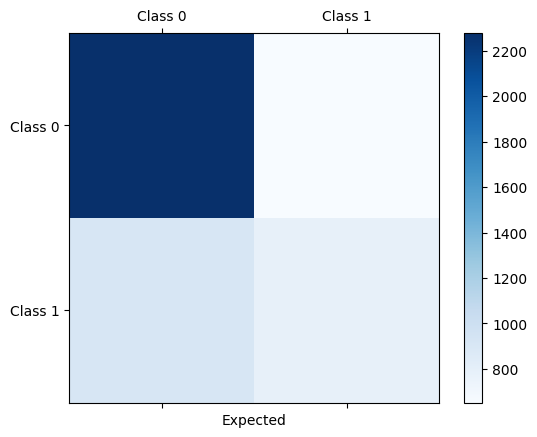

In [ ]:
labels = ['Class 0', 'Class 1']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(conf_mat,cmap=plt.cm.Blues)
fig.colorbar(cax)
ax.set_xticklabels(['']+labels)
ax.set_yticklabels(['']+labels)
plt.xlabel('Predicted')
plt.xlabel('Expected')
plt.show()